<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/First_Causal_Inference_Model_step2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

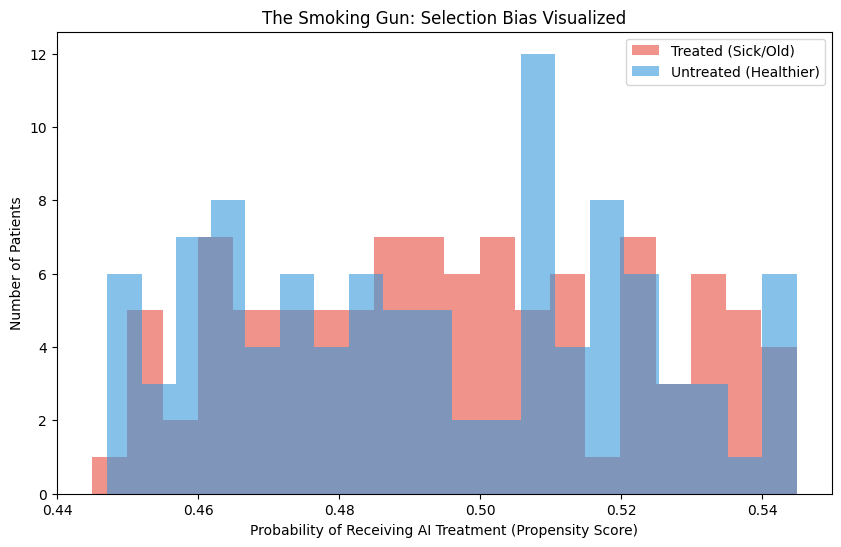

Look at the graph above!
The Red bars (Treated) are shifted to the RIGHT (High scores).
The Blue bars (Untreated) are shifted to the LEFT (Low scores).
They are NOT the same populations. Comparing them directly is unfair.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# --- Placeholder for df creation --- #
# In a real scenario, you would load your data here, e.g., df = pd.read_csv('your_data.csv')
# For demonstration, let's create a dummy DataFrame
np.random.seed(42)
n_patients = 200
data = {
    'Age': np.random.randint(20, 80, n_patients),
    'Severity': np.random.uniform(1, 10, n_patients),
    'Treated_with_AI': np.random.randint(0, 2, n_patients) # 0 or 1
}
df = pd.DataFrame(data)
# --- End of placeholder --- #

# ==========================================
# STEP 3: THE "PROPENSITY SCORE" INVESTIGATION
# ==========================================

# 1. We train a model to guess WHO got treated based only on Age & Severity
# This isolates the doctor's decision-making logic.
ps_model = LogisticRegression()
ps_model.fit(df[['Age', 'Severity']], df['Treated_with_AI'])

# 2. Assign a "Propensity Score" (0.0 to 1.0) to every patient
df['Propensity_Score'] = ps_model.predict_proba(df[['Age', 'Severity']])[:, 1]

# 3. Visualize the Trap
plt.figure(figsize=(10, 6))

# Plot Treated Patients (Red)
plt.hist(df[df['Treated_with_AI']==1]['Propensity_Score'],
         alpha=0.6, label='Treated (Sick/Old)', color='#e74c3c', bins=20)

# Plot Untreated Patients (Blue)
plt.hist(df[df['Treated_with_AI']==0]['Propensity_Score'],
         alpha=0.6, label='Untreated (Healthier)', color='#3498db', bins=20)

plt.title('The Smoking Gun: Selection Bias Visualized')
plt.xlabel('Probability of Receiving AI Treatment (Propensity Score)')
plt.ylabel('Number of Patients')
plt.legend(loc='upper right')
plt.show()

print("Look at the graph above!")
print("The Red bars (Treated) are shifted to the RIGHT (High scores).")
print("The Blue bars (Untreated) are shifted to the LEFT (Low scores).")
print("They are NOT the same populations. Comparing them directly is unfair.")